
Choose an operation:
1. Simple Thresholding
2. Adaptive Thresholding (Mean)
3. Otsu's Thresholding
4. Region Growing
5. Watershed Thresholding
6. Exit


Enter your choice (1-6):  1


Simple Thresholding:


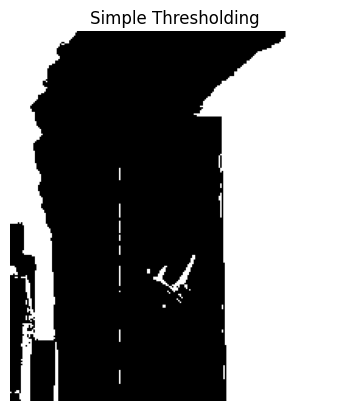


Choose an operation:
1. Simple Thresholding
2. Adaptive Thresholding (Mean)
3. Otsu's Thresholding
4. Region Growing
5. Watershed Thresholding
6. Exit


Enter your choice (1-6):  3


Otsu's Thresholding:


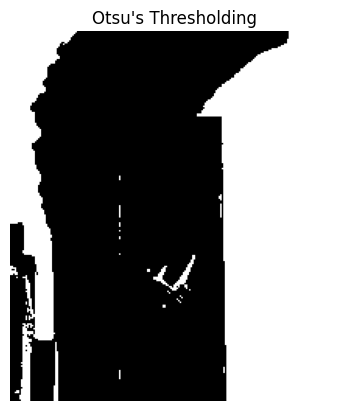


Choose an operation:
1. Simple Thresholding
2. Adaptive Thresholding (Mean)
3. Otsu's Thresholding
4. Region Growing
5. Watershed Thresholding
6. Exit


Enter your choice (1-6):  4
Enter seed x-coordinate:  20
Enter seed y-coordinate:  20
Enter intensity threshold for region growing:  300


Region Growing Result:


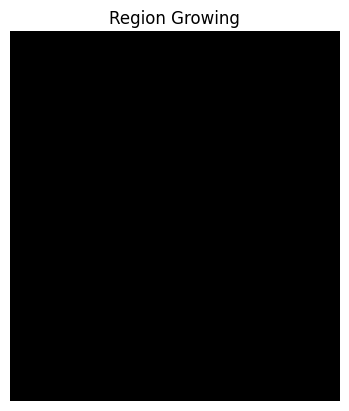


Choose an operation:
1. Simple Thresholding
2. Adaptive Thresholding (Mean)
3. Otsu's Thresholding
4. Region Growing
5. Watershed Thresholding
6. Exit


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Display a menu of operations
def display_menu():
    print("\nChoose an operation:")
    print("1. Simple Thresholding")
    print("2. Adaptive Thresholding (Mean)")
    print("3. Otsu's Thresholding")
    print("4. Region Growing")
    print("5. Watershed Thresholding")
    print("6. Exit")

# Function to display an image with a title
def show_image(img, title="Image"):
    plt.imshow(img, cmap='gray')  # Display the image in grayscale
    plt.title(title)
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

# Simple thresholding function
def simple_threshold(img):
    _, thresh = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
    return thresh

# Adaptive mean thresholding function
def adaptive_threshold_mean(img):
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5)

# Otsu's thresholding function
def otsu_threshold(img):
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

# Region growing segmentation function
def region_growing(img, seed, threshold):
    output = np.zeros_like(img)  # Initialize output image
    height, width = img.shape  # Get image dimensions
    pixels_to_check = [seed]  # Start with the seed pixel
    seed_intensity = img[seed]  # Intensity value at the seed pixel

    while pixels_to_check:
        current_pixel = pixels_to_check.pop()
        x, y = current_pixel

        # Check if pixel is out of bounds
        if x < 0 or x >= height or y < 0 or y >= width:
            continue

        # Skip if pixel is already processed
        if output[x, y] != 0:
            continue

        # Check intensity difference threshold
        if abs(int(img[x, y]) - int(seed_intensity)) < threshold:
            output[x, y] = 255  # Mark pixel as part of the region
            # Add neighbors to the list
            pixels_to_check.extend([(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)])
    return output

# Watershed segmentation function
def watershed_threshold(img):
    # Binary thresholding with Otsu's method
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)

    # Perform morphological operations to identify background and foreground
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Convert results to proper formats
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    # Apply watershed algorithm
    markers = cv2.watershed(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR), markers)
    img[markers == -1] = 255
    return img

# Load the image
img = cv2.imread('otsu.jpeg', cv2.IMREAD_GRAYSCALE)

last_thresholded_image = None

# Main loop to display the menu and handle user input
while True:
    display_menu()
    choice = input("Enter your choice (1-6): ")

    if choice == '1':
        last_thresholded_image = simple_threshold(img)
        print("Simple Thresholding:")
        show_image(last_thresholded_image, "Simple Thresholding")
        time.sleep(1)

    elif choice == '2':
        last_thresholded_image = adaptive_threshold_mean(img)
        print("Adaptive Mean Thresholding:")
        show_image(last_thresholded_image, "Adaptive Mean Thresholding")
        time.sleep(1)

    elif choice == '3':
        last_thresholded_image = otsu_threshold(img)
        print("Otsu's Thresholding:")
        show_image(last_thresholded_image, "Otsu's Thresholding")
        time.sleep(1)

    elif choice == '4':
        if last_thresholded_image is None:
            print("Please apply a thresholding technique first!")
            continue

        # Get user input for seed point and threshold
        seed_x = int(input("Enter seed x-coordinate: "))
        seed_y = int(input("Enter seed y-coordinate: "))
        if seed_x < 0 or seed_x >= img.shape[0] or seed_y < 0 or seed_y >= img.shape[1]:
            print("Invalid seed coordinates! Try again.")
            continue

        threshold_value = int(input("Enter intensity threshold for region growing: "))
        seed_point = (seed_x, seed_y)
        segmented_image = region_growing(img, seed_point, threshold_value)
        print("Region Growing Result:")
        show_image(segmented_image, "Region Growing")
        time.sleep(1)

    elif choice == '5':
        last_thresholded_image = watershed_threshold(img)
        print("Watershed Thresholding:")
        show_image(last_thresholded_image, "Watershed Thresholding")
        time.sleep(1)

    elif choice == '6':
        print("Exiting the program.")
        break

    else:
        print("Invalid choice. Please choose a valid option.")
